# **In this project, the dataset contains information about House Prices Prediction . This data can be used for a lot of purposes such as price prediction to exemplify the use of regression techniques in Machine Learning.**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
train_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
test_path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'
dataset = pd.read_csv(train_path)
dataset_test = pd.read_csv(test_path)

In [3]:
# First view of train dataframe viewing column and the data inside them and how they are arranged
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# First view of test dataframe
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**We will drop the Id column as it is not necessary for model training.**

In [5]:
dataset = dataset.drop('Id', axis=1)
dataset_test = dataset_test.drop('Id', axis=1)
dataset.head(3)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
dataset_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


**Dataset Rows & Columns count**

In [7]:
# Dataset Rows & Columns count
# we want the size of our train data (i.e, Dataset size) 
dataset.shape

(1460, 80)

In [8]:
# we also want the size of our test data (i.e, Dataset size) 
dataset_test.shape

(1459, 79)

**Dataset Information**

In [9]:
# Dataset Info
# checking for columns information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
# test data info
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [11]:
# Dataset Describe
# computing and displaying summary statistics for dataset
dataset.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


**Duplicate Value**

In [12]:
# Dataset Duplicate Value Count
duplicate_rows =  dataset.duplicated().value_counts()
print(f'All the False value indicates there is no non-duplicate rows: {duplicate_rows}')

All the False value indicates there is no non-duplicate rows: False    1460
dtype: int64


**Missing Values/Null Values**

In [13]:
# Missing Values/Null Values Count for train data
dataset.isna().sum().sort_values(ascending = False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [14]:
# Missing Values/Null Values Count for test data
dataset_test.isna().sum().sort_values(ascending = False)[0:35]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
SaleType           1
BsmtFinSF1         1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
BsmtFinSF2         1
TotRmsAbvGrd       0
KitchenAbvGr       0
dtype: int64

In [15]:
dataset=dataset.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [16]:
dataset_test = dataset_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

### Some of the columns needs to be treated well as there is a high number of null values are present in them.

In [17]:
# treating all the missing values with mode(of their respective column) train data
dataset['BsmtQual'] = dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0])
dataset['BsmtCond'] = dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0])
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0])
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0])
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0])
dataset['GarageType'] = dataset['GarageType'].fillna(dataset['GarageType'].mode()[0])
dataset['GarageFinish'] = dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
dataset['GarageQual'] = dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0])
dataset['GarageCond'] = dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0])
dataset['MasVnrType'] = dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mode()[0])
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].mode()[0])
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mode()[0])

In [18]:
# treating all the missing values with mode(of their respective column) train data
dataset_test['BsmtQual'] = dataset_test['BsmtQual'].fillna(dataset_test['BsmtQual'].mode()[0])
dataset_test['BsmtCond'] = dataset_test['BsmtCond'].fillna(dataset_test['BsmtCond'].mode()[0])
dataset_test['BsmtExposure'] = dataset_test['BsmtExposure'].fillna(dataset_test['BsmtExposure'].mode()[0])
dataset_test['BsmtFinType1'] = dataset_test['BsmtFinType1'].fillna(dataset_test['BsmtFinType1'].mode()[0])
dataset_test['BsmtFinType2'] = dataset_test['BsmtFinType2'].fillna(dataset_test['BsmtFinType2'].mode()[0])
dataset_test['GarageType'] = dataset_test['GarageType'].fillna(dataset_test['GarageType'].mode()[0])
dataset_test['GarageFinish'] = dataset_test['GarageFinish'].fillna(dataset_test['GarageFinish'].mode()[0])
dataset_test['GarageQual'] = dataset_test['GarageQual'].fillna(dataset_test['GarageQual'].mode()[0])
dataset_test['GarageCond'] = dataset_test['GarageCond'].fillna(dataset_test['GarageCond'].mode()[0])
dataset_test['MasVnrType'] = dataset_test['MasVnrType'].fillna(dataset_test['MasVnrType'].mode()[0])
dataset_test['Electrical'] = dataset_test['Electrical'].fillna(dataset_test['Electrical'].mode()[0])
dataset_test['FireplaceQu'] = dataset_test['FireplaceQu'].fillna(dataset_test['FireplaceQu'].mode()[0])
dataset_test['LotFrontage'] = dataset_test['LotFrontage'].fillna(dataset_test['LotFrontage'].mode()[0])
dataset_test['GarageYrBlt'] = dataset_test['GarageYrBlt'].fillna(dataset_test['GarageYrBlt'].mode()[0])
dataset_test['MasVnrArea'] = dataset_test['MasVnrArea'].fillna(dataset_test['MasVnrArea'].mode()[0])

In [19]:
# Drop all rows with null values
dataset_test = dataset_test.dropna()

In [20]:
dataset_test.shape

(1447, 75)

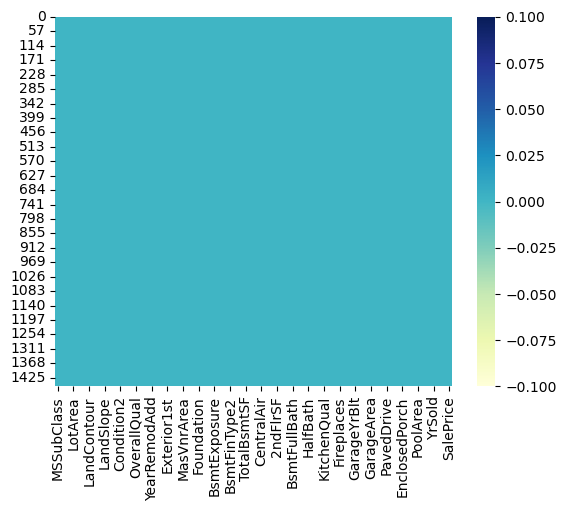

In [21]:
# Visualizing the missing values
# Creating a heatmap of missing values
sns.heatmap(dataset.isnull(), cmap="YlGnBu")
plt.show()

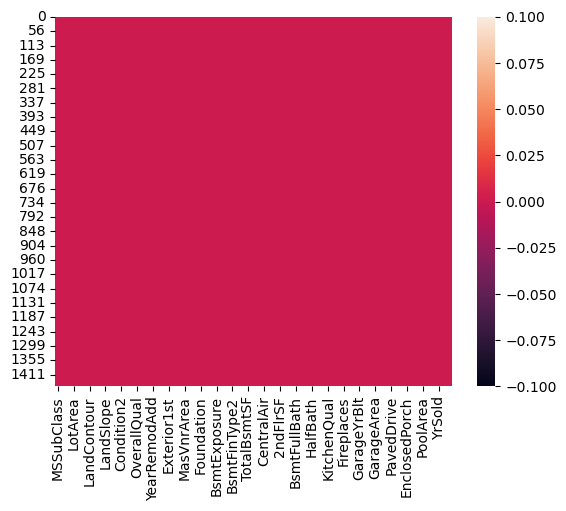

In [22]:
plt.figure()
sns.heatmap(dataset_test.isnull())
plt.show()

In [23]:
dataset.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
dataset_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


# Understanding Your Variables

In [25]:
# Dataset Columns
#checking features name of our column
dataset.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [26]:
# numeric columns
numeric_features = dataset.describe().columns
print(f"These are some of the numerical features:- {numeric_features}")

These are some of the numerical features:- Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [27]:
# categorical columns
categorical_features = dataset.describe(include=['object','category']).columns
print(f"These are some of the categorical features:- {categorical_features}")

These are some of the categorical features:- Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


**Unique Values for each variable**

In [28]:
# Check Unique Values for each variable.
numeric = dataset.select_dtypes(include=[np.number]).columns
for num_col in numeric:
    print(f"{num_col} : {dataset[num_col].nunique()} uniqueness variable(s)")

MSSubClass : 15 uniqueness variable(s)
LotFrontage : 110 uniqueness variable(s)
LotArea : 1073 uniqueness variable(s)
OverallQual : 10 uniqueness variable(s)
OverallCond : 9 uniqueness variable(s)
YearBuilt : 112 uniqueness variable(s)
YearRemodAdd : 61 uniqueness variable(s)
MasVnrArea : 327 uniqueness variable(s)
BsmtFinSF1 : 637 uniqueness variable(s)
BsmtFinSF2 : 144 uniqueness variable(s)
BsmtUnfSF : 780 uniqueness variable(s)
TotalBsmtSF : 721 uniqueness variable(s)
1stFlrSF : 753 uniqueness variable(s)
2ndFlrSF : 417 uniqueness variable(s)
LowQualFinSF : 24 uniqueness variable(s)
GrLivArea : 861 uniqueness variable(s)
BsmtFullBath : 4 uniqueness variable(s)
BsmtHalfBath : 3 uniqueness variable(s)
FullBath : 4 uniqueness variable(s)
HalfBath : 3 uniqueness variable(s)
BedroomAbvGr : 8 uniqueness variable(s)
KitchenAbvGr : 4 uniqueness variable(s)
TotRmsAbvGrd : 12 uniqueness variable(s)
Fireplaces : 4 uniqueness variable(s)
GarageYrBlt : 97 uniqueness variable(s)
GarageCars : 5 u

**Analyzing out target variable**

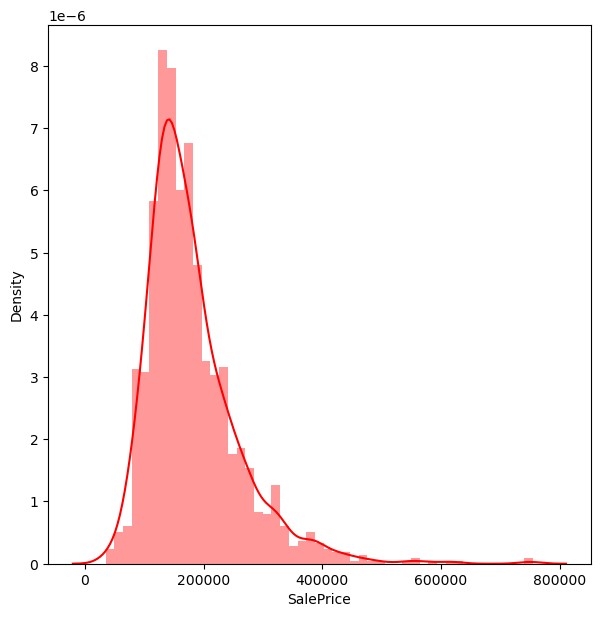

In [29]:
# Dependent variable 'SalePrice'
plt.figure(figsize=(7,7))
sns.distplot(dataset['SalePrice'],color="r")
plt.show()

Applying the log transformation so that we can see the change in the distribution and as it will now show somewhat normal distribution for our dependent variable 'SalePrice'.



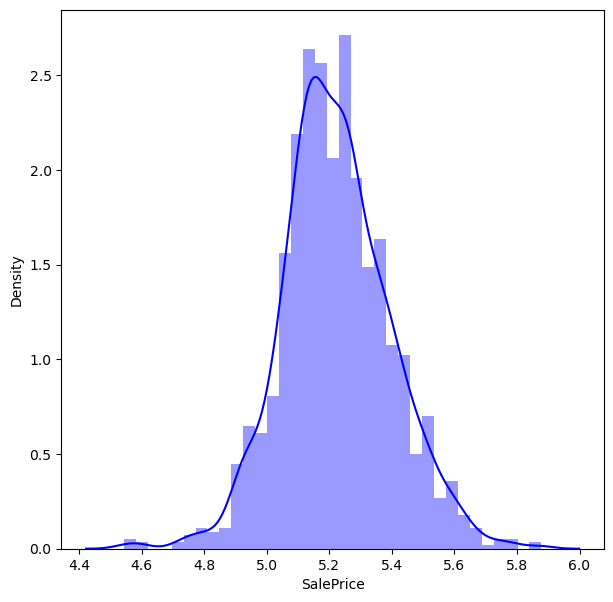

In [30]:
# Dependent variable 'SalePrice'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['SalePrice']),color="b")
plt.show()

Log transformation can help in making the distribution more symmetrical, which is desirable for certain statistical analyses that assume a normal distribution. 

**Checking the distribution for all the numerical independent variables**

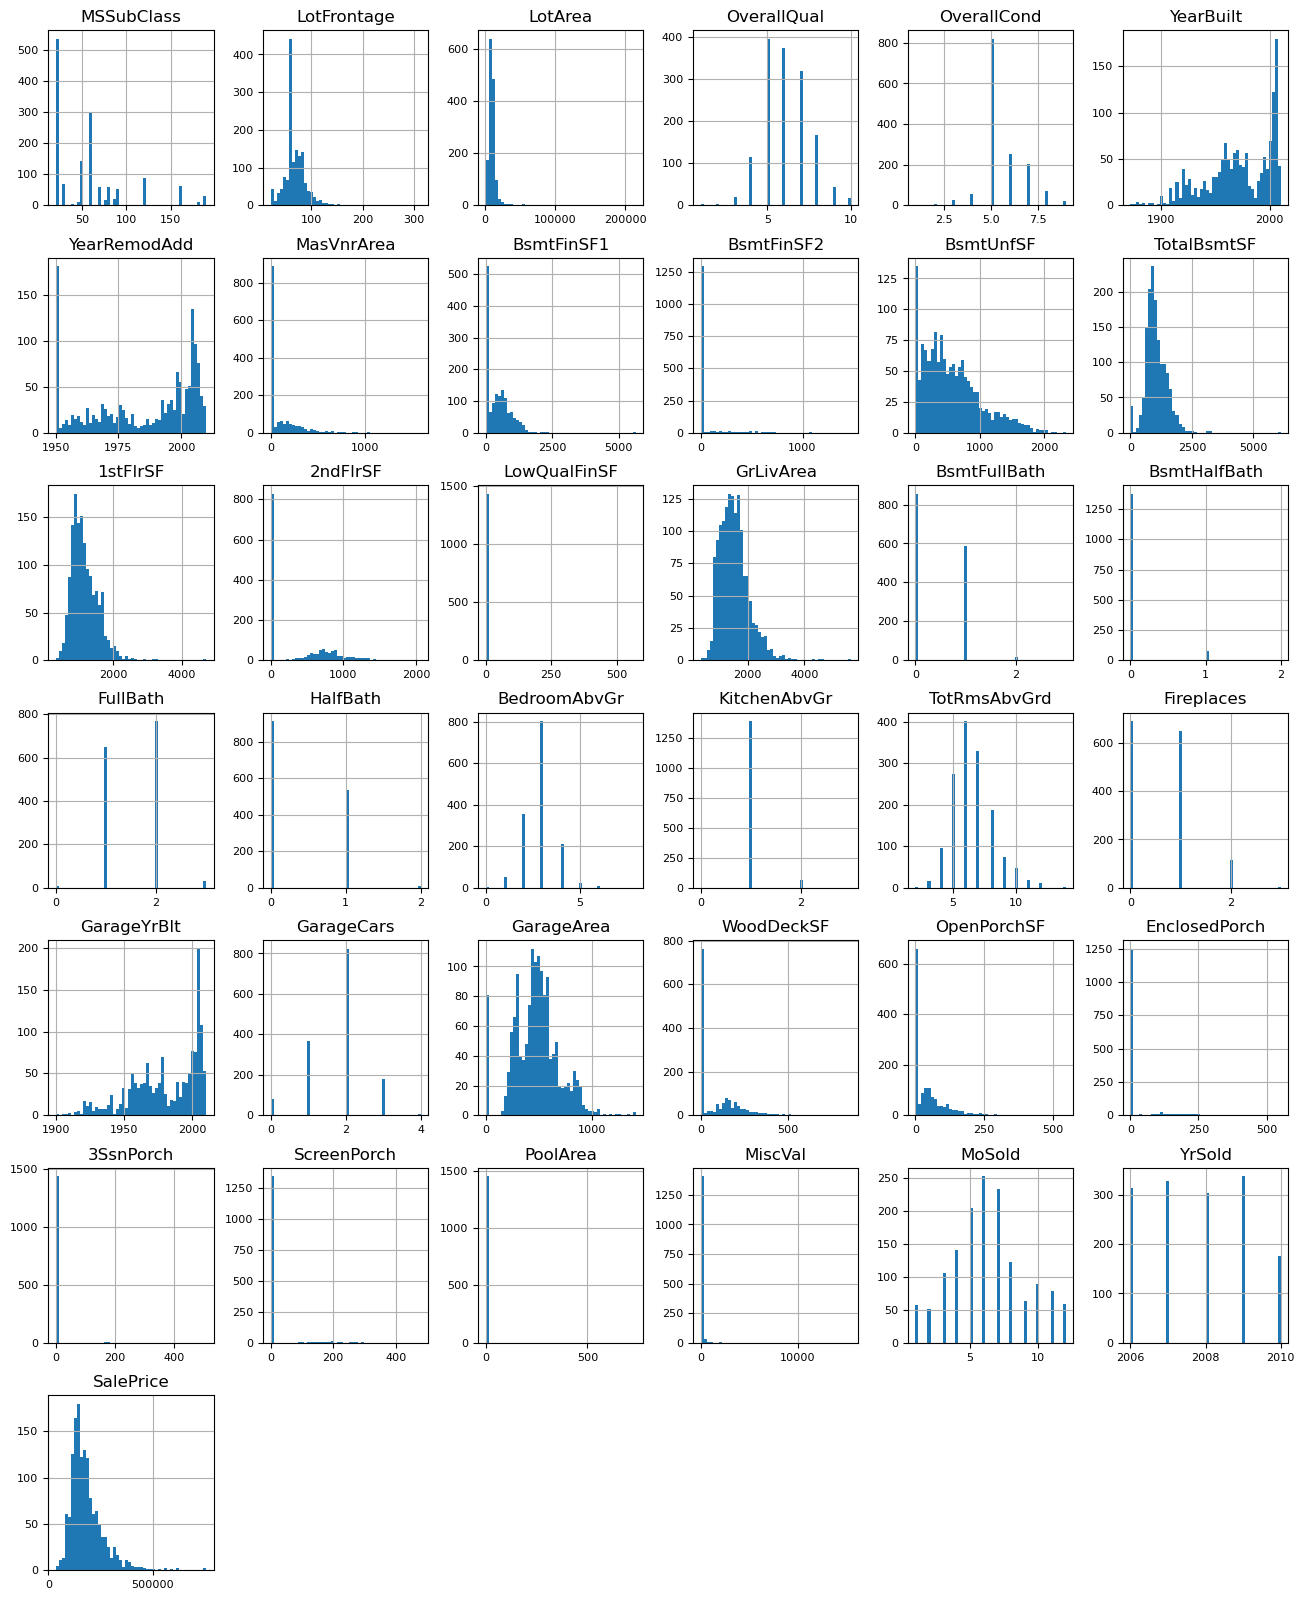

In [31]:
# Histogram for all numerical independent variables
dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Treating outlier

In [32]:
# Handling Outliers & Outlier treatments
# Capping the outlier rows

# GrLivArea
dataset = dataset[dataset['GrLivArea'] < 3000]

# TotalBsmtSF
dataset = dataset[dataset['TotalBsmtSF'] < 2100]

# 1stFlrSF
dataset = dataset[dataset['1stFlrSF'] < 2100]

# GarageYrBlt
dataset = dataset[dataset['GarageYrBlt'] > 1950]

# GarageArea
dataset = dataset[dataset['GarageArea'] < 1000]

# OpenPorchSF
dataset = dataset[dataset['OpenPorchSF'] < 250]

# EnclosedPorch
dataset = dataset[dataset['EnclosedPorch'] < 250]

# ScreenPorch
dataset = dataset[dataset['ScreenPorch'] < 300]

# SalePrice
dataset = dataset[dataset['SalePrice'] < 500000]

In [33]:
dataset.shape

(1186, 76)

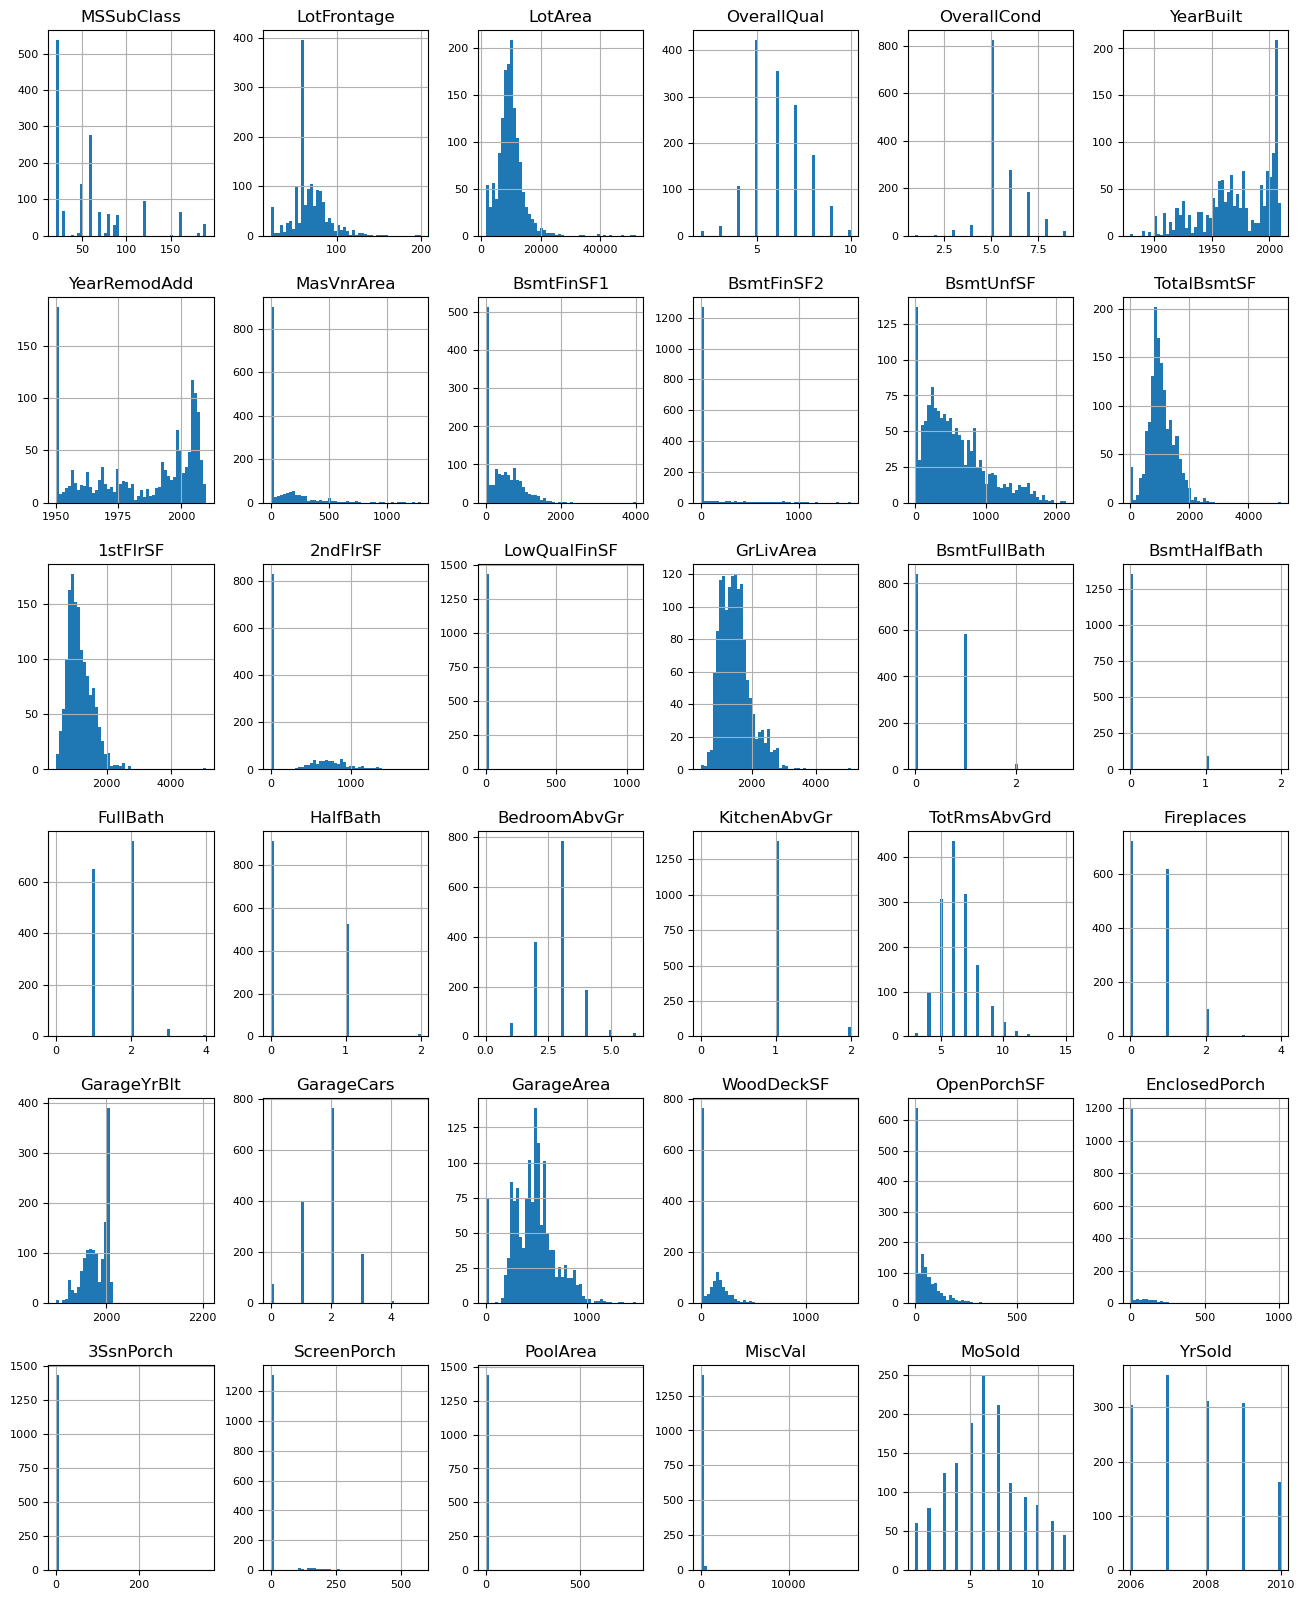

In [34]:
# Histogram for all numerical independent variables in test data
dataset_test.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [35]:
# Handling Outliers & Outlier treatments
# Capping the outlier rows

# GrLivArea
dataset_test = dataset_test[dataset_test['GrLivArea'] < 3000]

# TotalBsmtSF
dataset_test = dataset_test[dataset_test['TotalBsmtSF'] < 2100]

# 1stFlrSF
dataset_test = dataset_test[dataset_test['1stFlrSF'] < 2100]

# GarageYrBlt
dataset_test = dataset_test[(dataset_test['GarageYrBlt'] > 1950) & (dataset_test['GarageYrBlt'] < 2025)]

# GarageArea
dataset_test = dataset_test[dataset_test['GarageArea'] < 1000]

# OpenPorchSF
dataset_test = dataset_test[dataset_test['OpenPorchSF'] < 250]

# EnclosedPorch
dataset_test = dataset_test[dataset_test['EnclosedPorch'] < 250]

# ScreenPorch
dataset_test = dataset_test[dataset_test['ScreenPorch'] < 300]

<Axes: >

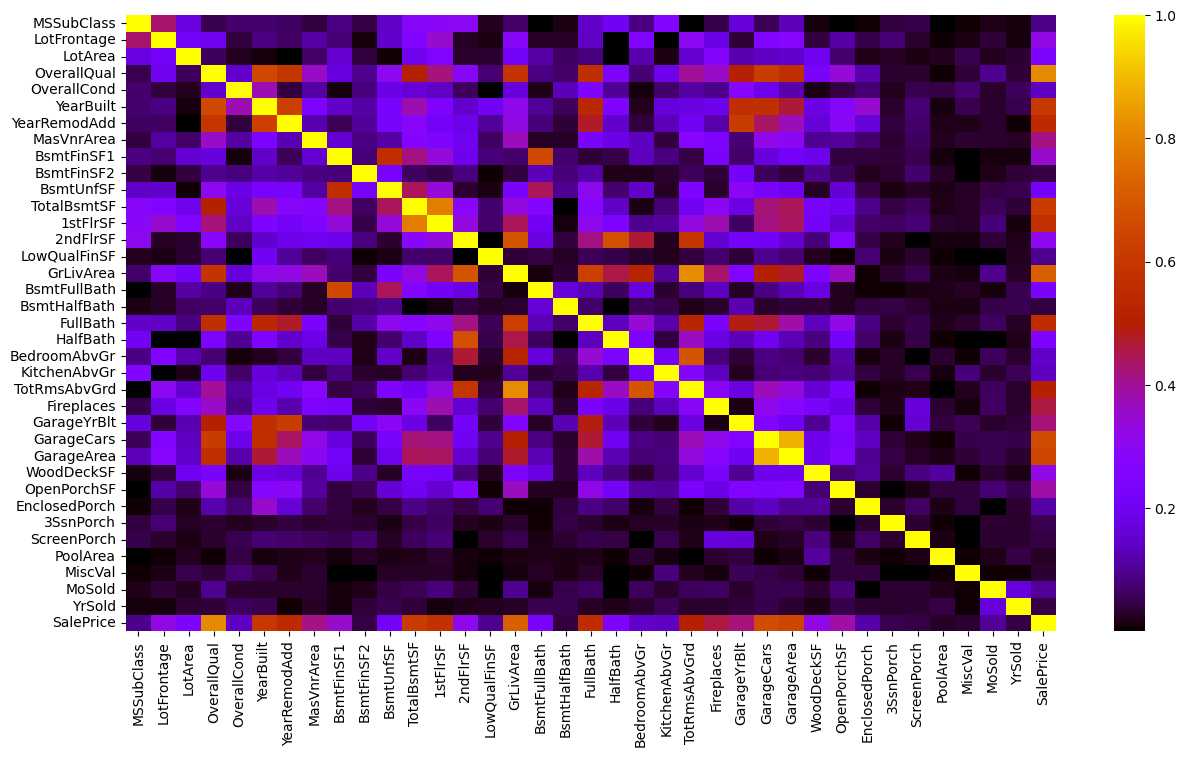

In [36]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), cmap='gnuplot')

We have only considered the columns which are correlated with our target variable(SalePrice).

In [37]:
important_num_cols = list(dataset.corr()["SalePrice"][(dataset.corr()["SalePrice"]>0.30) | (dataset.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

In [38]:
important_num_cols

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [39]:
dataset_pred = dataset[important_cols]
dataset_pred

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,0,61,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,298,0,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,0,42,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,192,84,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
5,85.0,5,1993,1995,0.0,732,796,796,566,1362,...,40,30,143000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,90.0,5,2006,2006,0.0,0,1140,1140,0,1140,...,36,56,84500,RL,AllPub,1Fam,GasA,TA,Abnorml,Gtl
1454,62.0,7,2004,2005,0.0,410,1221,1221,0,1221,...,0,113,185000,FV,AllPub,1Fam,GasA,Gd,Normal,Gtl
1455,62.0,6,1999,2000,0.0,0,953,953,694,1647,...,0,40,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,85.0,6,1978,1988,119.0,790,1542,2073,0,2073,...,349,0,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl


# Ploting a scatter plot of every numerical variable with target variable

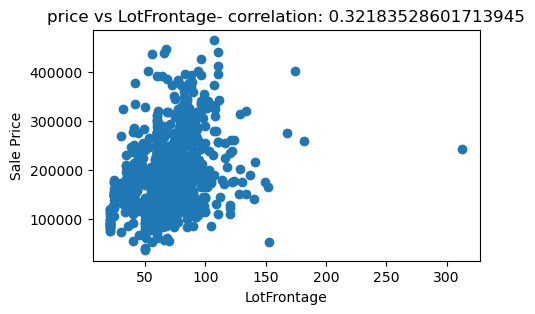

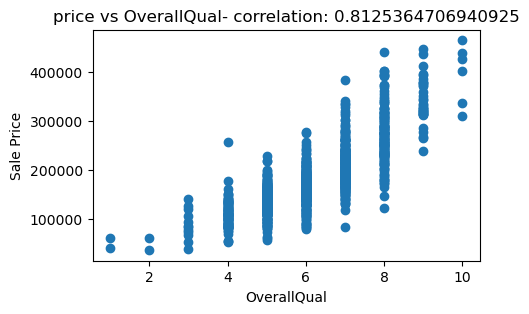

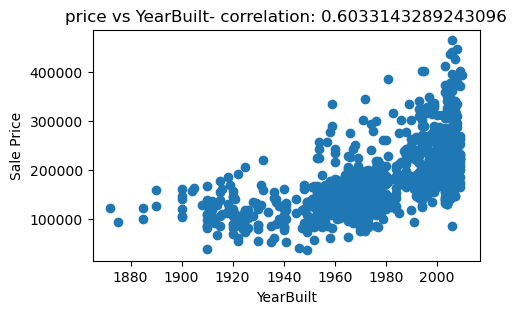

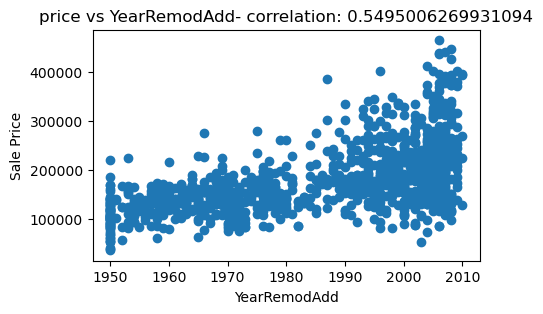

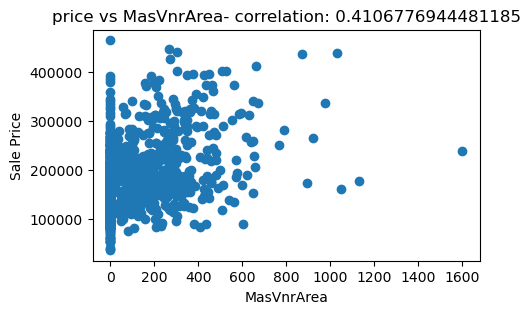

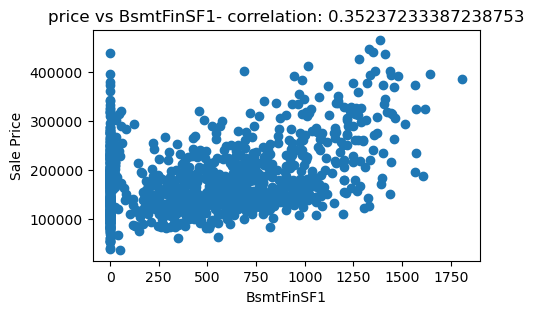

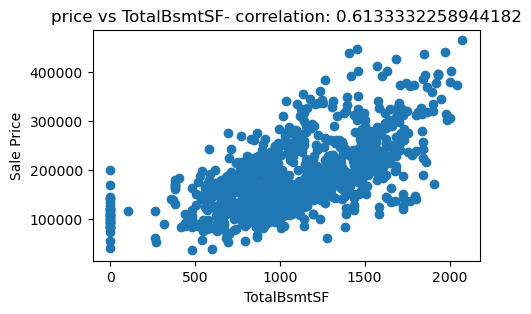

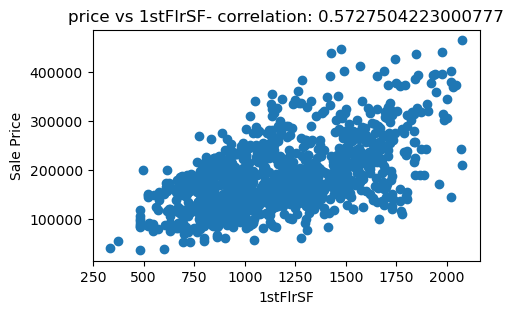

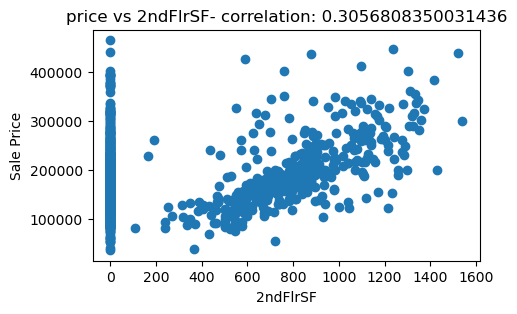

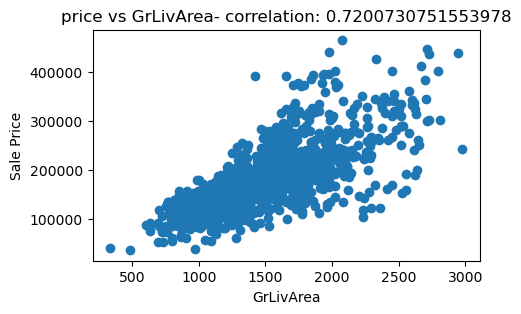

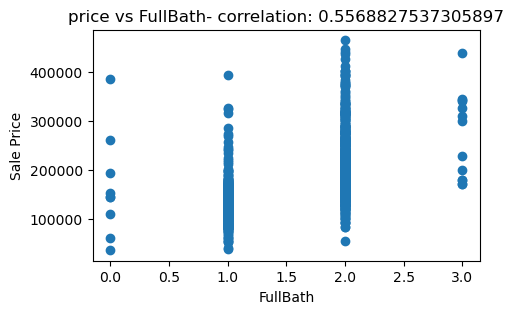

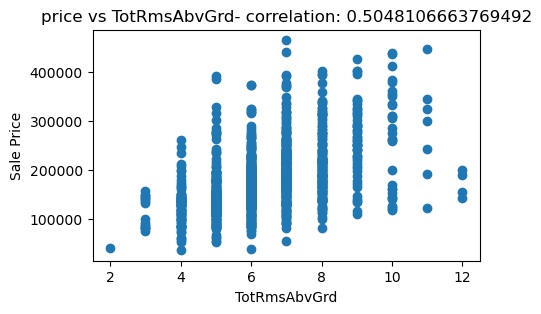

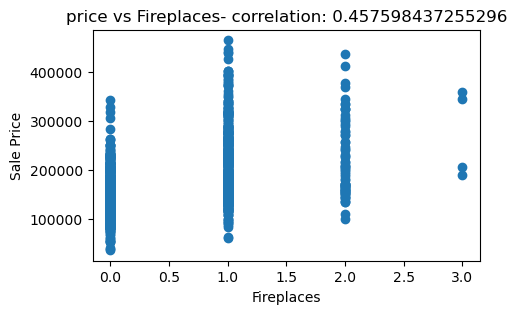

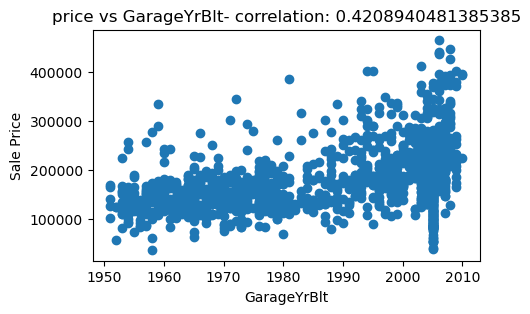

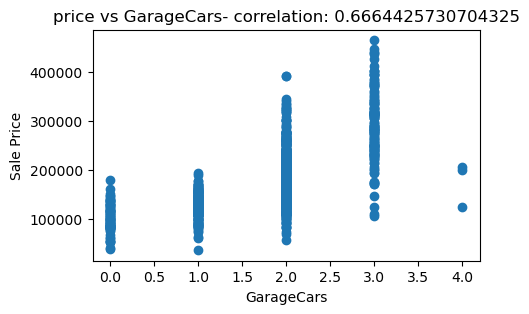

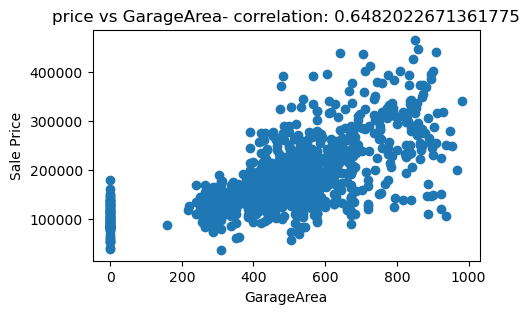

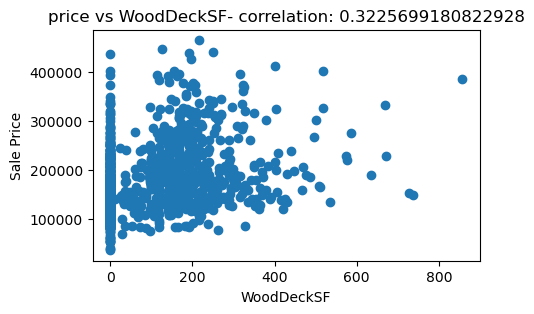

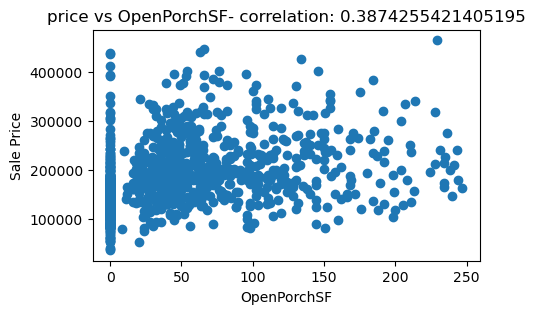

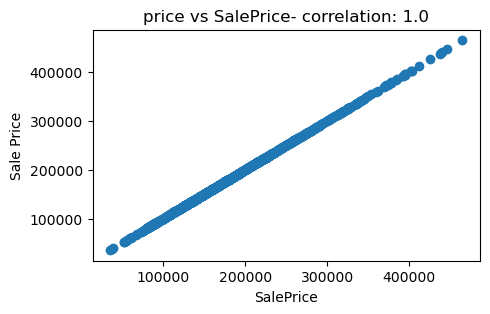

In [40]:
for col in important_num_cols:
    fig = plt.figure(figsize=(5,3))
    ax = fig.gca()
    feature = dataset_pred[col]
    label = dataset_pred['SalePrice']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
  

plt.show()

In [41]:
X = dataset_pred.drop("SalePrice", axis=1)
y = dataset_pred["SalePrice"]

## One-Hot Encoding

One-Hot Encoding is a technique used to convert categorical variables into a numerical format. It represents each category as a binary column, with 1 indicating the presence of that category and 0 otherwise. This allows machine learning algorithms to process categorical data effectively.

In [42]:
X = pd.get_dummies(X, columns=cat_cols)

## Standardizing the Data

It is a data preprocessing technique used in machine learning to scale features to a specified range. It scales the data to a fixed range of [0, 1].
It is also useful when features have different scales or ranges and you want to normalize them to a common scale.
Standardizing the data involves transforming variables to have zero mean and unit variance. It improves model performance, allows fair comparisons between variables, and enhances interpretability. It is a common preprocessing step in data analysis and machine learning.

In [43]:
important_num_cols.remove("SalePrice")
scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [44]:
X.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-0.130760,0.661431,0.958416,0.830766,0.537515,0.590149,-0.515146,-0.867639,1.284330,0.545281,...,0,0,0,0,0,1,0,1,0,0
1,0.569067,-0.087812,-0.060657,-0.580897,-0.625587,1.233658,0.544906,0.328971,-0.746154,-0.465613,...,1,0,0,0,0,1,0,1,0,0
2,0.009205,0.661431,0.882930,0.778482,0.335752,0.069665,-0.348045,-0.679011,1.312861,0.716772,...,0,0,0,0,0,1,0,1,0,0
4,0.755688,1.410674,0.845186,0.673915,1.451381,0.469492,0.239423,-0.015865,1.757475,1.646433,...,0,0,0,0,0,1,0,1,0,0
5,0.802343,-0.837054,0.580982,0.412495,-0.625587,0.651661,-0.671804,-1.044479,0.599576,-0.239967,...,1,0,0,0,0,1,0,1,0,0


In [45]:
print(X.shape)
print(y.shape)

(1186, 49)
(1186,)


## Data Splitting

Train-test split is a technique used to divide a dataset into a training set for model training and a testing set for evaluating the model's performance. It helps assess how well the model generalizes to new, unseen data and prevents overfitting.

In [46]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(948, 49)
(238, 49)


## Linear Regression

In [47]:
# ML Model - 1 Implementation

reg = LinearRegression()

# Fit the Algorithm
reg.fit(X_train, y_train)

Regression_score = reg.score(X_train, y_train)

# Predict on the model
print(f'Regression score {Regression_score}')

Regression score 0.8947478430648008


In [48]:
predictions = reg.predict(X_test)
predictions

array([198197.05687692, 151183.01887117, 208708.33486077,  91304.75092854,
       223287.85480802, 137049.00939114, 131869.11346238, 206009.22696873,
       267877.49335326, 167179.96525452, 273036.33148576, 218864.91168158,
       226294.85411398,  89720.97523631, 103126.84902915, 213964.65636143,
        86081.27911161, 124115.62080015,  97884.06497116, 175794.81635239,
       144704.76245004, 215632.70302852, 305468.50305405, 148997.72262651,
       137956.76784506, 218087.7718258 , 255993.52811285, 350023.81523759,
       226292.8526446 , 183185.48872006,  70565.10565434, 104619.25132414,
       327442.49134728, 265908.64441995, 183499.93215347, 116678.25744236,
       156270.73014616, 166053.69876958, 177142.5723764 , 295574.56917151,
       243171.93916504,  84968.85287247, 294728.01410791, 264127.84289174,
       190169.09494407,  97616.20589625,  69221.19884471, 267861.43935451,
       117821.1901381 ,  62653.63525335, 160453.92556356, 114820.76019357,
       225296.74504557, 1

In [49]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [50]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

### Evaluating our Linear Regression Model

In [51]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

rmse_cross_val = rmse_cv(reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 16426.0117390637
MSE: 503363947.4868822
RMSE: 22435.77383303019
R2 Score: 0.8873582248399601
RMSE Cross-Validation: 23423.278499977016


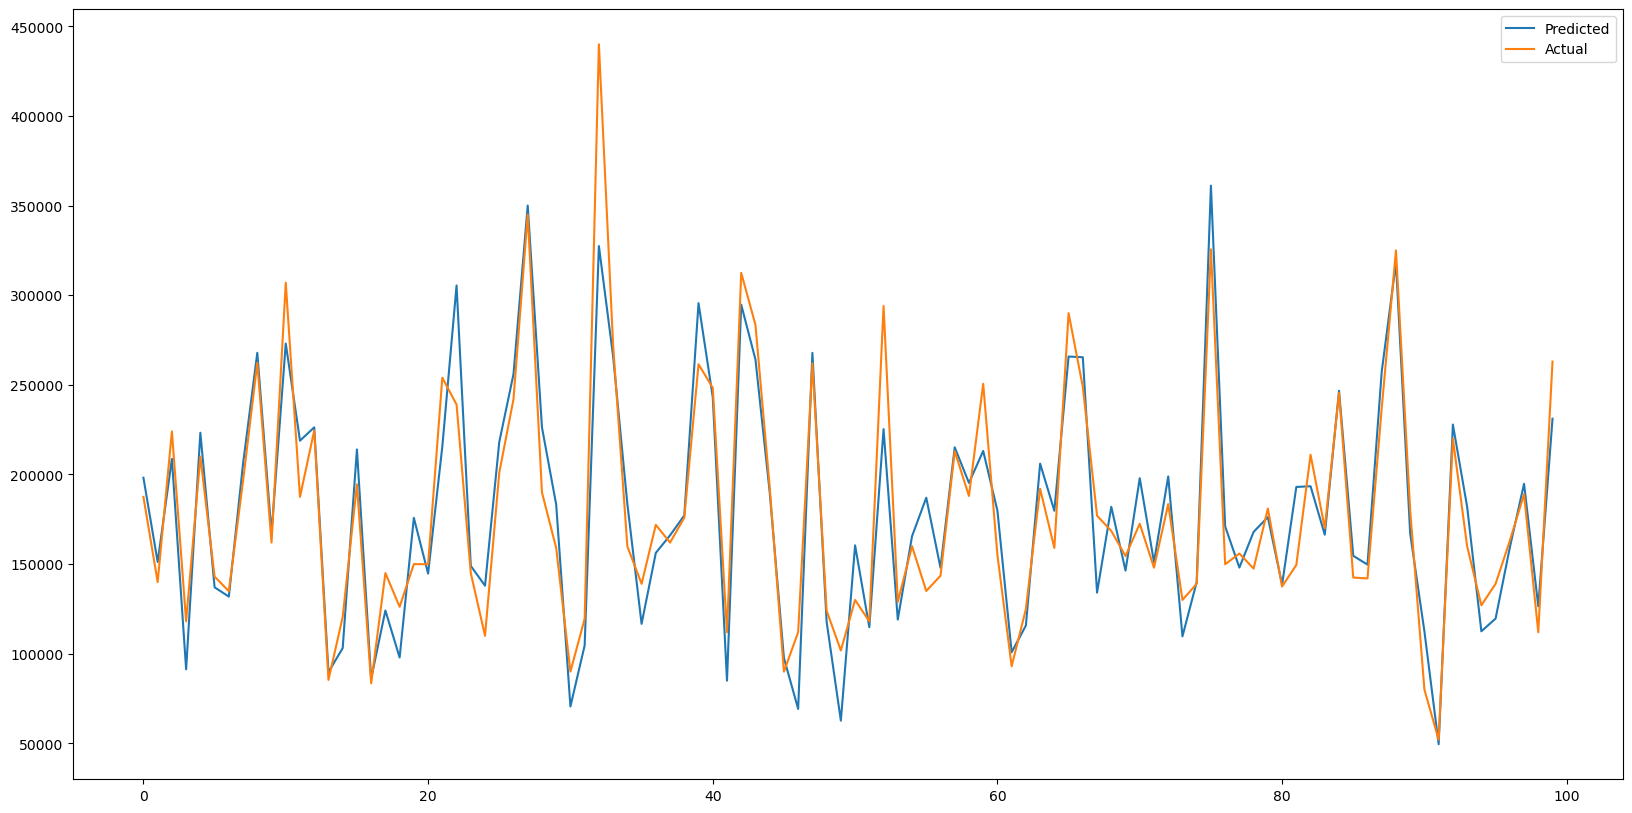

In [52]:
# ploting line graph to visualize predicted and actual value
plt.figure(figsize=(20,10))
plt.plot(predictions[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

The x-axis of the graph represents the data points, which could be numerical or sequential identifiers for each observation. The y-axis represents the values being predicted or measured.

The orange line, which represents the actual values, shows the ground truth or observed values of the target variable. It provides a reference for evaluating the accuracy of the predictions made by the regression model.

The blue line, representing the predicted values, illustrates the model's estimated or forecasted values for the target variable based on the input data and learned parameters. It represents the line of best fit generated by the linear regression algorithm.

By comparing the two lines, you can visually assess how well the model's predictions align with the actual values. If the blue line closely follows the orange line, it suggests that the model has effectively captured the underlying pattern in the data and is providing accurate predictions. On the other hand, if there are significant deviations or discrepancies between the two lines, it indicates that the model's predictions are less accurate.

## Random Forest Regressor

In [53]:
# Model  Implementation
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=0)

# Fit the Algorithm
rf_reg.fit(X_train, y_train)

# Predict on the model
predictions_rf = rf_reg.predict(X_test)

In [54]:
predictions_rf

array([250450.9244741 , 170105.23996448, 184937.8111907 , 104556.48077092,
       220728.37096131, 138063.25561979, 136288.7302154 , 192312.26903502,
       284184.64026979, 169333.31527869, 288988.32751858, 212673.5387515 ,
       198188.42173595,  99232.13849001, 118094.75694943, 203578.04501853,
        93762.10148392, 139347.32017   , 142731.53157536, 139109.28472904,
       142372.43768659, 221040.04024738, 303462.38613842, 160783.93081525,
       119114.73309155, 231026.16160792, 248388.44702672, 354671.77634509,
       218092.25158016, 182581.11378031, 122398.31666832, 111670.82992406,
       345620.23764883, 274749.45894042, 184906.0195498 , 106595.2997554 ,
       171558.38949583, 164216.4019155 , 181618.80070787, 264828.67507187,
       225067.55393304, 109730.41338755, 306367.07540286, 252452.37066176,
       179449.60363756,  99188.41470806, 103784.55137162, 295862.00905163,
       136652.26355536, 118348.21429847, 179288.64603396,  97673.42123759,
       220436.01924541, 1

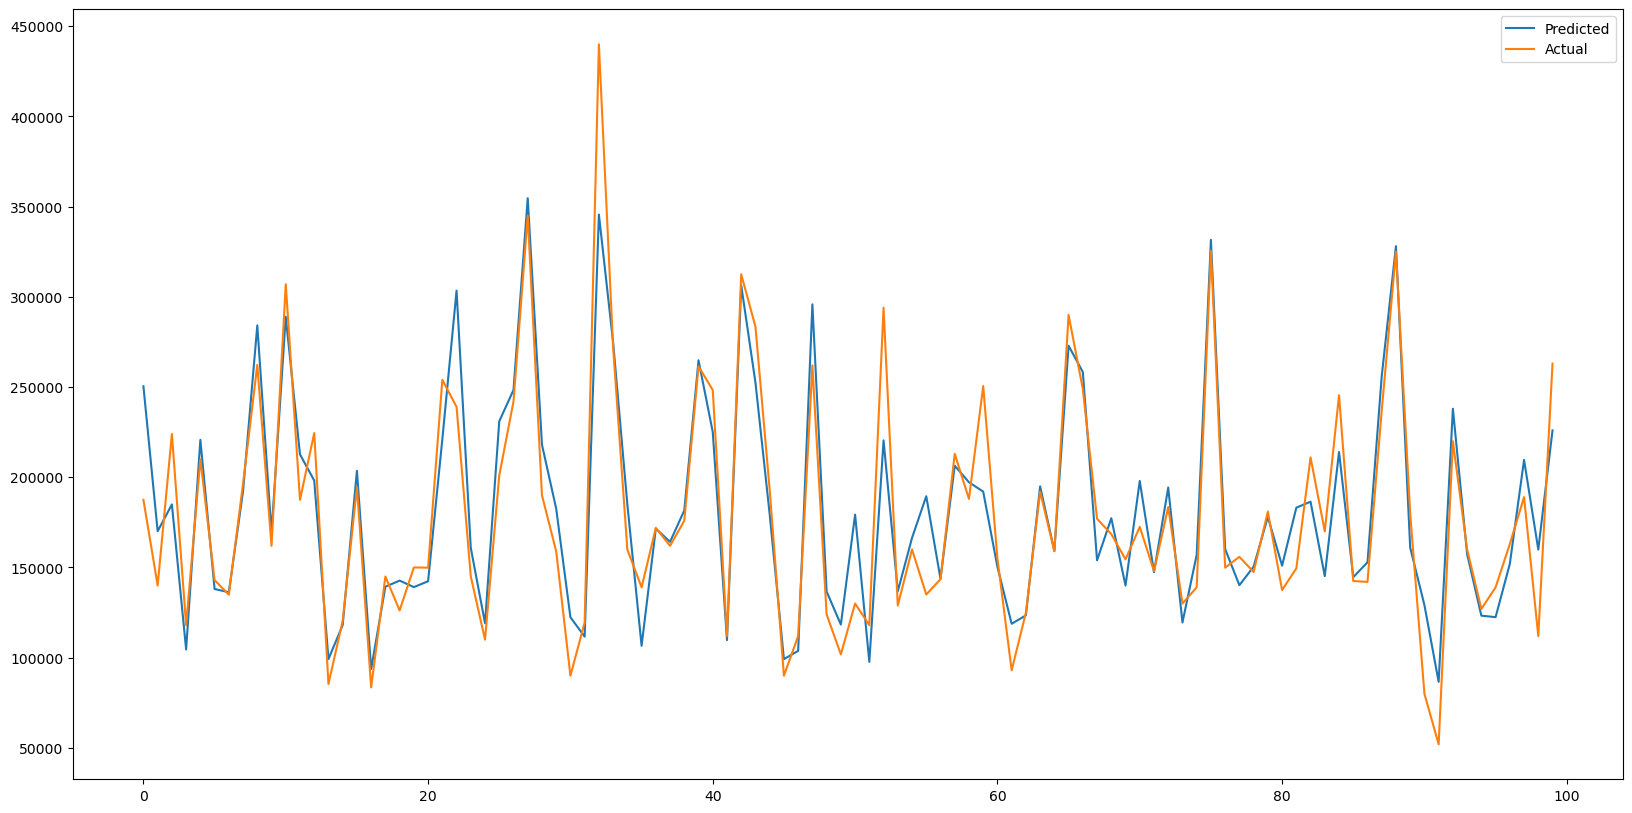

In [55]:
# ploting line graph to visualize predicted and actual value
plt.figure(figsize=(20,10))
plt.plot(predictions_rf[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

### Evaluating our Random Forest Model

In [56]:
mae, mse, rmse, r_squared = evaluation(y_test, predictions_rf)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(rf_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18081.57059212544
MSE: 603435163.4395854
RMSE: 24564.91733020051
R2 Score: 0.8649644887299063
------------------------------
RMSE Cross-Validation: 25181.109060917828


### XGBoost Regression

In [57]:
# Model  Implementation

xgb_reg = XGBRegressor(n_estimators=100)  # You can adjust the number of estimators
xgb_reg.fit(X_train, y_train)
predictions_xgb = xgb_reg.predict(X_test)

In [58]:
predictions_xgb

array([233657.78 , 170475.16 , 176885.81 ,  85242.8  , 228172.1  ,
       130491.21 , 129029.22 , 185625.83 , 308559.6  , 163145.88 ,
       300415.25 , 205155.61 , 215650.62 ,  95435.12 , 114125.86 ,
       203134.88 ,  91339.97 , 123266.42 , 126461.84 , 149252.52 ,
       161759.38 , 250580.56 , 299344.5  , 159854.08 , 130592.81 ,
       228643.19 , 248716.9  , 367942.8  , 217125.28 , 187031.66 ,
        97388.35 , 107183.14 , 400498.44 , 245077.64 , 178230.94 ,
       113361.016, 166743.19 , 165559.52 , 177997.03 , 276047.62 ,
       188621.5  , 104951.24 , 284003.   , 214626.67 , 188540.75 ,
        87295.8  ,  94952.37 , 260509.   , 131917.86 ,  93524.55 ,
       161021.64 ,  91923.6  , 217072.64 , 134983.67 , 157353.69 ,
       198015.05 , 146132.9  , 198866.69 , 202798.31 , 191838.17 ,
       155847.69 ,  99743.75 , 126380.94 , 198081.55 , 153011.14 ,
       267509.5  , 253841.2  , 153167.47 , 178115.69 , 132335.66 ,
       196379.97 , 164132.4  , 195964.45 , 106588.57 , 124118.

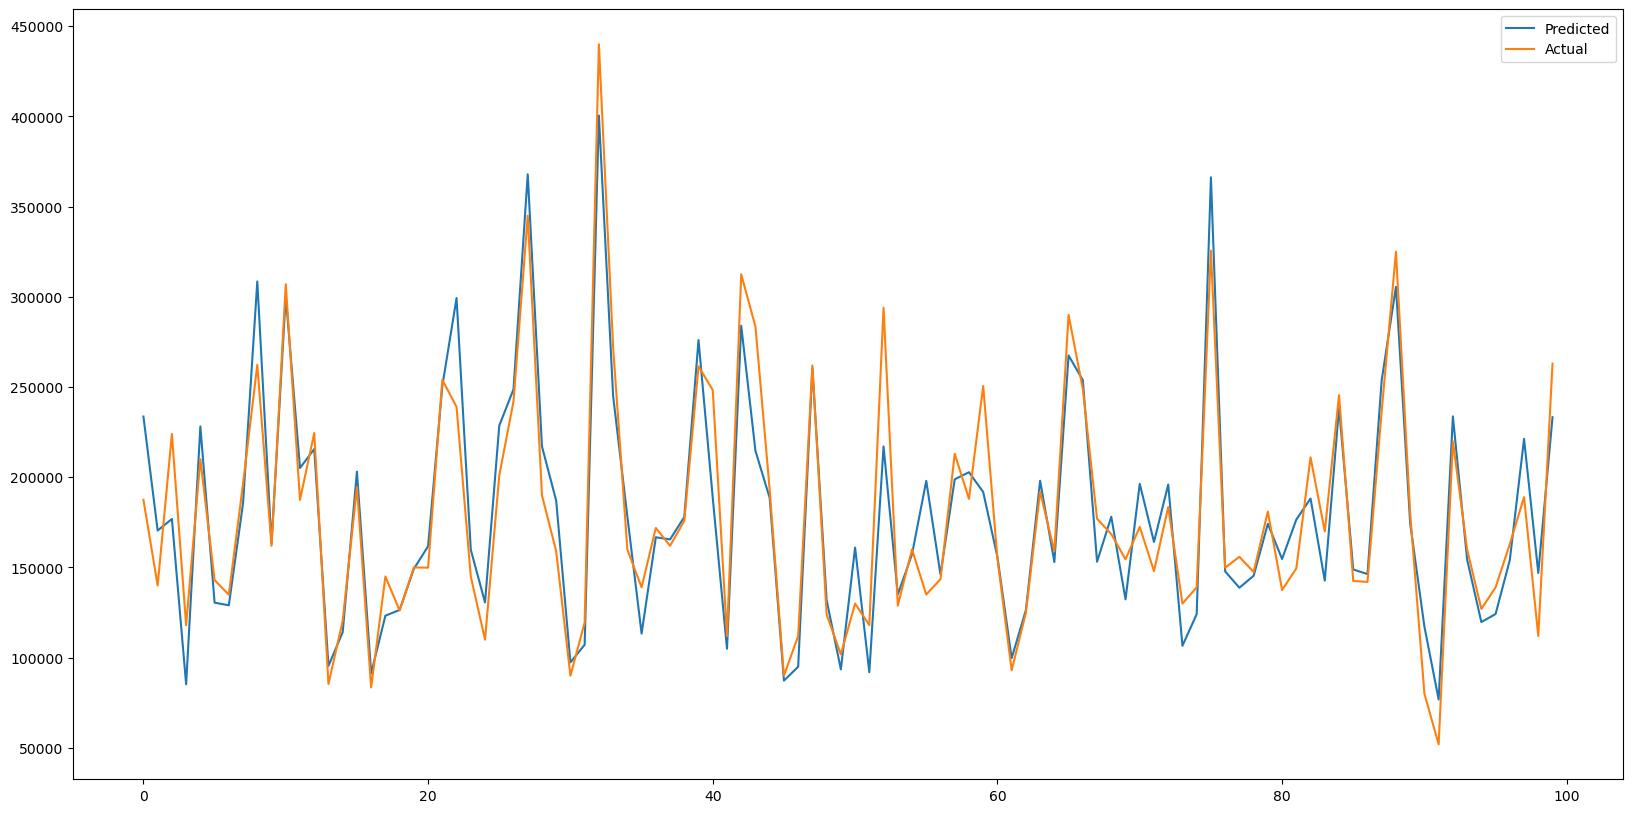

In [59]:
# ploting line graph to visualize predicted and actual value
plt.figure(figsize=(20,10))
plt.plot(predictions_xgb[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

### Evaluating our XGBoost Model

In [60]:
mae, mse, rmse, r_squared = evaluation(y_test, predictions_xgb)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17920.1846769958
MSE: 589558297.0041499
RMSE: 24280.82158832666
R2 Score: 0.8680698260842208
------------------------------
RMSE Cross-Validation: 25341.706073376437


# Model Comparison

In [61]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,16426.011739,5.033639e+08,22435.773833,0.887358,23423.278500
1,RandomForestRegressor,18081.570592,6.034352e+08,24564.917330,0.864964,25181.109061
2,XGBRegressor,17920.184677,5.895583e+08,24280.821588,0.868070,25341.706073


# Conclusion

Overall, all three models perform relatively well, with the linear regression model having the lowest MAE and RMSE. However, the ensemble models (Random Forest and XGBoost) provide slightly lower R2 scores, indicating overall performance in explaining the variance in the target variable. It's important to note that the performance of these models can vary depending on the specific dataset and thorough analysis 
In our case, after cleaning and manipulating the dataset, I ended up with 1,186 rows and 49 columns. This reduction in the number of rows and columns suggests that you have performed some data preprocessing steps, such as removing missing values, handling outliers, selecting relevant features and we have likely enhanced the models' ability to capture important signals and make accurate predictions.